In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

   FeelsLikeC  humidity  tempC        date      time
0          18        91     14  2009-01-01  00:00:00
1          17        93     14  2009-01-01  01:00:00
2          16        94     13  2009-01-01  02:00:00
3          15        96     12  2009-01-01  03:00:00
4          18        88     14  2009-01-01  04:00:00


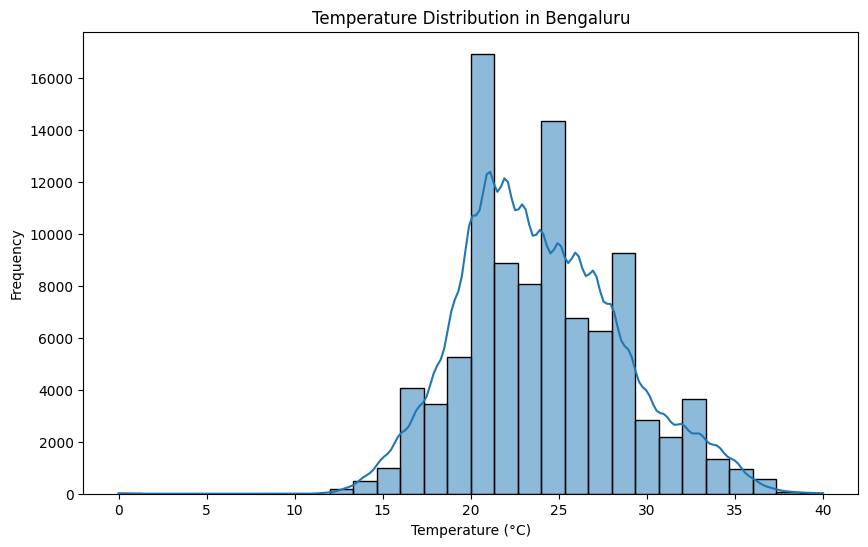

In [3]:
# Load the dataset
bengaluru_data = pd.read_csv('bengaluru_modified.csv', encoding='ascii')

# Display the head of the dataset to understand its structure
print(bengaluru_data.head())

# Plotting distributions
# Temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(bengaluru_data['tempC'], bins=30, kde=True)
plt.title('Temperature Distribution in Bengaluru')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()



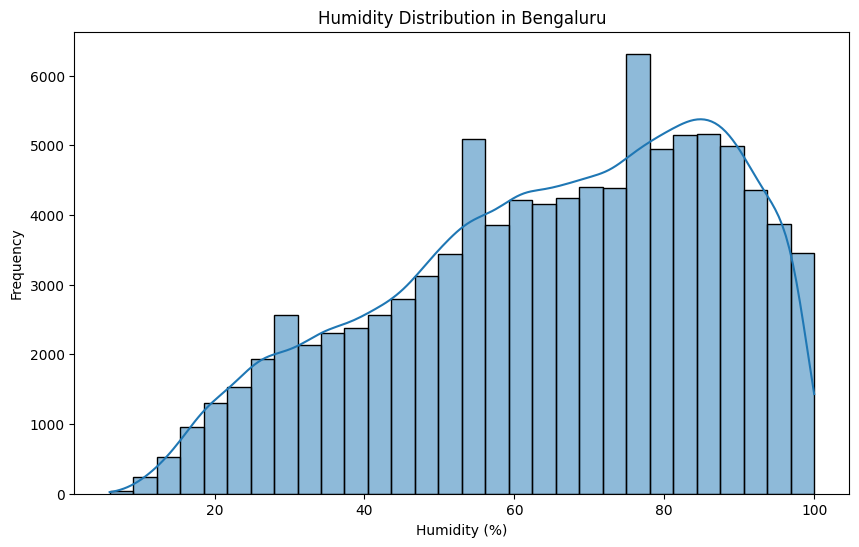

In [4]:
# Humidity distribution
plt.figure(figsize=(10, 6))
sns.histplot(bengaluru_data['humidity'], bins=30, kde=True)
plt.title('Humidity Distribution in Bengaluru')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

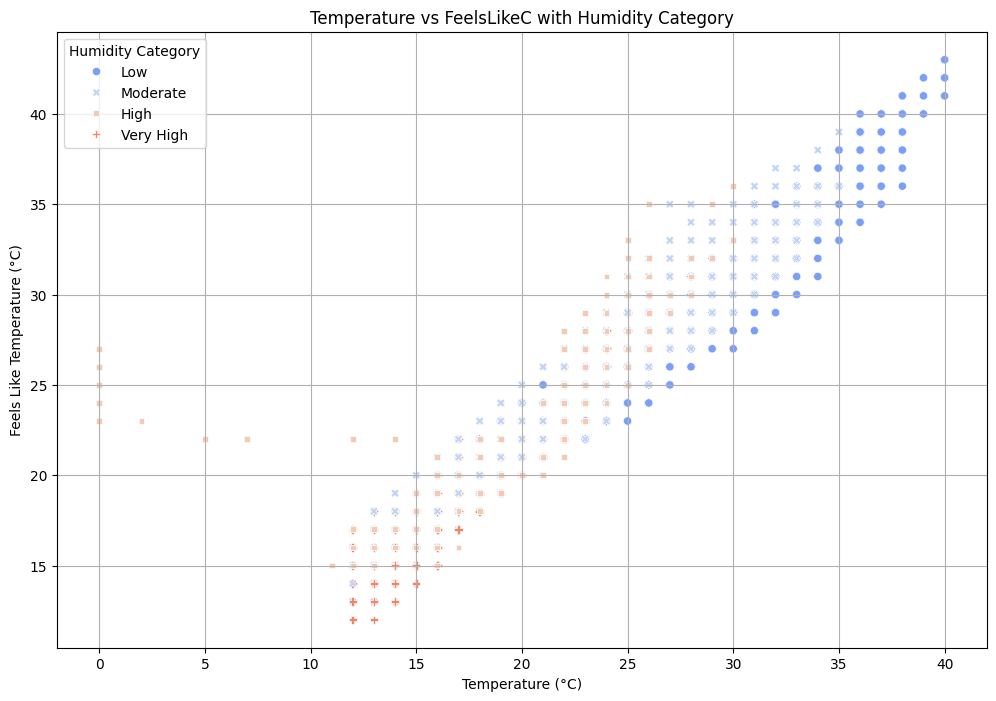

In [5]:
bengaluru_data['HumidityCategory'] = pd.cut(bengaluru_data['humidity'], bins=[0, 30, 60, 90, 100], labels=['Low', 'Moderate', 'High', 'Very High'])

# Scatter plot for Temperature vs FeelsLikeC with Humidity Category
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tempC', y='FeelsLikeC', hue='HumidityCategory', data=bengaluru_data, palette='coolwarm', style='HumidityCategory')
plt.title('Temperature vs FeelsLikeC with Humidity Category')
plt.xlabel('Temperature (°C)')
plt.ylabel('Feels Like Temperature (°C)')
plt.legend(title='Humidity Category')
plt.grid(True)
plt.show()

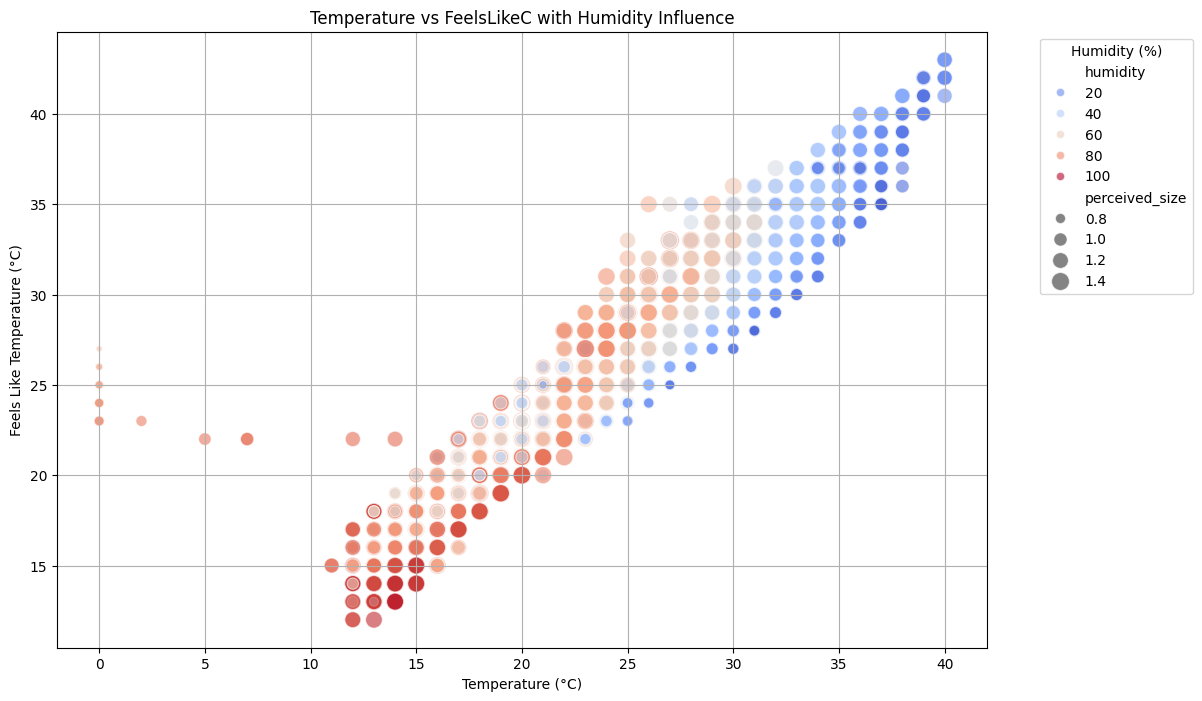

In [6]:
# Normalize the temperature and humidity to use in the size parameter
scaler = MinMaxScaler()
bengaluru_data[['tempC_norm', 'humidity_norm']] = scaler.fit_transform(bengaluru_data[['tempC', 'humidity']])

# Calculate a 'perceived size' based on normalized temperature and humidity
bengaluru_data['perceived_size'] = bengaluru_data['tempC_norm'] + bengaluru_data['humidity_norm']

# Scatter plot for Temperature vs FeelsLikeC with perceived size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tempC', y='FeelsLikeC', size='perceived_size', sizes=(20, 200), hue='humidity', data=bengaluru_data, palette='coolwarm', alpha=0.6)
plt.title('Temperature vs FeelsLikeC with Humidity Influence')
plt.xlabel('Temperature (°C)')
plt.ylabel('Feels Like Temperature (°C)')
plt.legend(title='Humidity (%)', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()